In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# 1. Load dataset
df = pd.read_csv('digit_data.csv')
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
# 2. Convert the data given in the dataFrame into a NumPy array
data = np.array(df)
data

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [7, 0, 0, ..., 0, 0, 0],
       [6, 0, 0, ..., 0, 0, 0],
       [9, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [4]:
# 3. Query the shape of the array
data_shape = data.shape
data_count = data_shape[0]
features = data_shape[1]

data_count, features

(42000, 785)

In [5]:
# 4. Shuffle the contents of the array 
np.random.shuffle(data)

In [6]:
# 5. Use first 1000 images of the dataset as the test set and remaining as the train set
test = data[:1000]
train = data[1000:]

In [7]:
# For test set -- Transpose the data (Take rows as the labels of the test set and rows as the features)
test = test.T
X_test = test[1:, :]
y_test = test[0,:]
X_test = X_test / 255 # Color normalization


test.shape, X_test.shape, y_test.shape 

((785, 1000), (784, 1000), (1000,))

In [8]:
# For train set -- Transpose the data (Take rows as the labels and rows as the features)
train = train.T
X_train = train[1:, :]
y_train = train[0]

X_train = X_train / 255

train.shape, X_train.shape, y_train.shape 

((785, 41000), (784, 41000), (41000,))

In [9]:
# Generate a random index in the range dedicated for training images
index = np.random.randint(0, len(train),1)
index

array([274])

In [10]:
train.shape

(785, 41000)

In [11]:
train[index].shape

(1, 41000)

In [12]:
train_ = train.T
new_img = train_[index, :-1]
new_img.shape

new_image = new_img.reshape(28,-1)
new_image.shape

(28, 28)

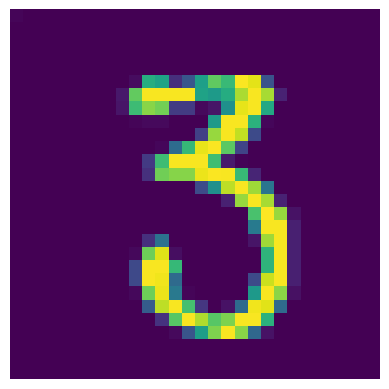

In [13]:
# X_test_2d = new_img.reshape(28,-1)
# X_test_2d.shape
plt.imshow(new_image) 
plt.axis('off')
plt.show()

In [14]:
def initial_params():    
    W1 = np.random.uniform(low=-0.5, high=0.5, size=(10,784))
    W2 = np.random.uniform(low=-0.5, high=0.5, size=(10,10))
    b1 = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
    b2 = np.random.uniform(low=-0.5, high=0.5, size=(10,1))

    # print(W1.shape, W2.shape, b1.shape, b2.shape)
    return W1, b1, W2, b2

_, _, W2, _ = initial_params()
W2[:100]

array([[ 0.1938706 , -0.20770728, -0.04275416,  0.06862972, -0.10847776,
        -0.38415725,  0.46425799, -0.18895804,  0.26042428,  0.26724913],
       [-0.04644633, -0.05231552, -0.08420608,  0.38863779, -0.16951878,
        -0.07868585, -0.49554358, -0.37104233, -0.0609815 , -0.03581845],
       [ 0.30746493,  0.39176365, -0.30057767, -0.29705141, -0.24682377,
        -0.38075023, -0.46805579,  0.19565304, -0.16530743, -0.0629814 ],
       [-0.3260424 ,  0.22876199, -0.49525185,  0.48660275,  0.20194552,
        -0.46639577, -0.14071379, -0.00775764,  0.01746949, -0.45933288],
       [ 0.10909117,  0.16354465,  0.09086094, -0.40469683, -0.19802409,
        -0.47634992,  0.41655848,  0.37216103,  0.26573554, -0.41107863],
       [-0.04151206, -0.46756171,  0.15992551, -0.49103526, -0.27124186,
        -0.22291318,  0.20633061, -0.08346861, -0.25321715, -0.43830776],
       [-0.10110306, -0.12517247, -0.44004427, -0.19477058, -0.28434259,
         0.24673325,  0.3358008 , -0.42771972

In [15]:
def tanh_fn(vector):
    p_exp = np.exp(vector)
    n_exp = np.exp(-vector)
    return (p_exp - n_exp) / (p_exp + n_exp)

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
tanh = tanh_fn(vector)
vector, tanh

(array([[-0.30913658],
        [ 0.26969535],
        [ 0.06051685],
        [ 0.10692357],
        [ 0.34592772],
        [-0.39663247],
        [ 0.22517008],
        [ 0.32945086],
        [ 0.1465822 ],
        [ 0.00255357]]),
 array([[-0.2996514 ],
        [ 0.26334134],
        [ 0.06044308],
        [ 0.10651795],
        [ 0.33275911],
        [-0.37706389],
        [ 0.22144021],
        [ 0.31802726],
        [ 0.14554131],
        [ 0.00255356]]))

In [24]:
def d_tanh(vector):
    tan_h = tanh_fn(vector)
    return 1 - np.power(tan_h, 2) # return 4 / pow((np.exp(vector)+np.exp(-vector)),2)

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
d_tan = d_tanh(vector)
vector, d_tan

(array([[-0.07410968],
        [-0.24408653],
        [ 0.18091073],
        [ 0.4904162 ],
        [-0.22850607],
        [ 0.47578513],
        [-0.06954077],
        [-0.41905403],
        [ 0.35032775],
        [ 0.21351301]]),
 array([[0.9945278 ],
        [0.94271066],
        [0.9679724 ],
        [0.7933873 ],
        [0.94955023],
        [0.8038735 ],
        [0.99517963],
        [0.84307848],
        [0.88665589],
        [0.95576273]]))

In [27]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(100,1))
vector

array([[ 0.38161365],
       [-0.44769861],
       [ 0.12012648],
       [-0.07423492],
       [ 0.17642567],
       [ 0.07996329],
       [ 0.1901924 ],
       [-0.20524294],
       [-0.11406901],
       [ 0.4936856 ],
       [ 0.30494067],
       [-0.19949543],
       [ 0.20926098],
       [-0.18923924],
       [ 0.3462112 ],
       [ 0.10200319],
       [-0.36940063],
       [-0.29766589],
       [-0.47197614],
       [ 0.43036812],
       [-0.37980879],
       [-0.17576734],
       [ 0.30795387],
       [-0.02843774],
       [-0.29465895],
       [-0.33383574],
       [-0.35714252],
       [-0.15046174],
       [-0.31756572],
       [-0.42482937],
       [ 0.16891949],
       [ 0.34978747],
       [-0.18879895],
       [-0.0567273 ],
       [-0.31423148],
       [-0.01464093],
       [-0.04057384],
       [-0.22290736],
       [ 0.30798146],
       [-0.2342166 ],
       [ 0.21656753],
       [ 0.45210841],
       [ 0.33749411],
       [ 0.28306936],
       [ 0.4919775 ],
       [-0

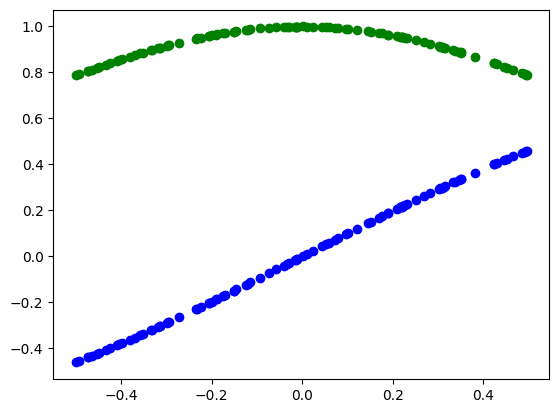

In [28]:
tan_h = tanh_fn(vector)
d_tan_h = d_tanh(vector)

plt.scatter(vector, tan_h, c='blue')
plt.scatter(vector, d_tan_h, c='green')


In [29]:
def sigmoid(vector):
    return 1 / (1 + np.exp(-vector))

vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
softmax = sigmoid(vector)
vector, softmax

(array([[ 0.17880687],
        [-0.25522783],
        [ 0.01330156],
        [-0.11722704],
        [-0.03961057],
        [-0.13964129],
        [-0.43760348],
        [ 0.3249054 ],
        [-0.37029766],
        [-0.01677396]]),
 array([[0.544583  ],
        [0.43653717],
        [0.50332534],
        [0.47072676],
        [0.49009865],
        [0.46514629],
        [0.39231216],
        [0.58051927],
        [0.4084691 ],
        [0.49580661]]))

In [20]:
# def df_softmax(vector):
#     d_softmax = softmax_fn(vector) * (1 - softmax_fn(vector))

#     return d_softmax

# vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
# d_softmax = softmax_fn(vector)
# vector, d_softmax

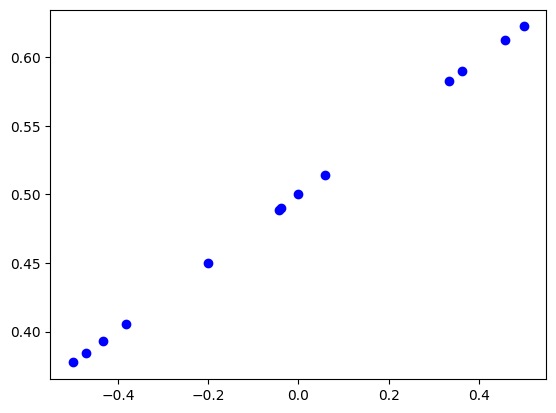

In [30]:
vector = np.random.uniform(low=-0.5, high=0.5, size=(10,1))
vector = np.append(vector, [0.00000, -0.5, 0.5])
vector

sigm = sigmoid(vector)
# d_softmax = df_softmax(vector)

plt.scatter(vector, sigm, c='blue')
# plt.scatter(vector, d_softmax, c='green')


In [43]:
def forward_prop(W1, b1, W2, b2, A0):
    Z1 = np.dot(W1, A0) + b1
    A1 = tanh_fn(Z1)

    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)

    return Z1, A1, Z2, A2

In [32]:
# One hot encoding
def one_hot_encoding(Y, num_classes):
    num_classes = int(num_classes)  # Ensure num_classes is an integer
    encoded_mat = np.zeros((num_classes, len(Y)))
    for i in range(len(Y)):
        class_index = int(Y[i])
        encoded_mat[class_index, i] = 1
    return encoded_mat

y_train = one_hot_encoding(y_train, num_classes=10)
y_train.shape
y_test = one_hot_encoding(y_test, num_classes=10)
y_test.shape


(10, 1000)

In [33]:
# Backward propagation
def backward_prop(Z1, A1, Z2, A2, W1, W2, y, A0, y_train):
    m = A0.shape[1]
    dZ2 = A2 - y_train
    dZ1 = np.dot(W2.T, dZ2) * d_tanh(Z1)

    dW1 = (1 / m) * np.dot(dZ1, A0.T)
    dW2 = (1 / m) * np.dot(dZ2, A1.T)
    db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)
    db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

    return dW1, db1, dW2, db2

In [34]:
# Update parameters
def update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate= 0.01):
    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2

    return W1, b1, W2, b2

In [35]:
def obtain_predictions(vector):  # Corrected parameter name
    return np.argmax(vector, axis=0)


In [36]:
%pip install scikit-learn
from sklearn.metrics import accuracy_score


[notice] A new release of pip is available: 23.3.2 -> 24.1.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [37]:
def accuracy_sc(y_pred, y_actual): # Vectors  
    num_samples = y_actual.shape[1]

    if y_pred.ndim ==2:
        pred_label = obtain_predictions(y_pred)
    else:
        pred_label = y_pred
        
    if y_actual.ndim == 2:
        actual_label = obtain_predictions(y_actual)
    else:
        actual_label = y_actual
    
    num_correct = np.sum(pred_label == actual_label)
    # print(num_correct)
    return num_correct / num_samples

In [38]:
y_train.shape

(10, 41000)

In [39]:
def gradient_descent(X_train, y_train, learning_rate, num_iterations):
    W1, b1, W2, b2 = initial_params()

    accuracy_list = []

    for i in range(num_iterations+1):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X_train)
        dW1, db1, dW2, db2 = backward_prop(Z1, A1, Z2, A2, W1, W2, y_train, X_train, y_train)
        W1, b1, W2, b2 = update_parameters(W1, b1, W2, b2, dW1, db1, dW2, db2, learning_rate)

        if i%5==0:
            accuracy = accuracy_sc(A2,y_train)
            accuracy_list.append((i,accuracy))
            print(f"Iteration: {i} \t Accuracy: {accuracy:.5f}")

    return W1, b1, W2, b2, accuracy_list

In [40]:
def make_prediction(X_test, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X_test) 
    pred = obtain_predictions(A2)
    return pred    

In [41]:
def plot_image(image):
    X_test_2d = image.reshape(28,-1)
    print(X_test_2d.shape)
    plt.imshow(X_test_2d) 
    plt.axis('off')
    plt.show()

In [44]:
W1, b1, W2, b2, accuracy_list = gradient_descent(X_train, y_train, learning_rate=0.0001, num_iterations=1000)

Iteration: 0 	 Accuracy: 0.05568
Iteration: 5 	 Accuracy: 0.05578
Iteration: 10 	 Accuracy: 0.05578
Iteration: 15 	 Accuracy: 0.05568
Iteration: 20 	 Accuracy: 0.05566
Iteration: 25 	 Accuracy: 0.05563
Iteration: 30 	 Accuracy: 0.05568
Iteration: 35 	 Accuracy: 0.05576
Iteration: 40 	 Accuracy: 0.05585
Iteration: 45 	 Accuracy: 0.05598
Iteration: 50 	 Accuracy: 0.05605
Iteration: 55 	 Accuracy: 0.05615
Iteration: 60 	 Accuracy: 0.05629
Iteration: 65 	 Accuracy: 0.05627
Iteration: 70 	 Accuracy: 0.05644
Iteration: 75 	 Accuracy: 0.05641
Iteration: 80 	 Accuracy: 0.05656
Iteration: 85 	 Accuracy: 0.05651
Iteration: 90 	 Accuracy: 0.05659
Iteration: 95 	 Accuracy: 0.05671
Iteration: 100 	 Accuracy: 0.05683
Iteration: 105 	 Accuracy: 0.05698
Iteration: 110 	 Accuracy: 0.05712
Iteration: 115 	 Accuracy: 0.05720
Iteration: 120 	 Accuracy: 0.05729
Iteration: 125 	 Accuracy: 0.05732
Iteration: 130 	 Accuracy: 0.05739
Iteration: 135 	 Accuracy: 0.05746
Iteration: 140 	 Accuracy: 0.05759
Iterati

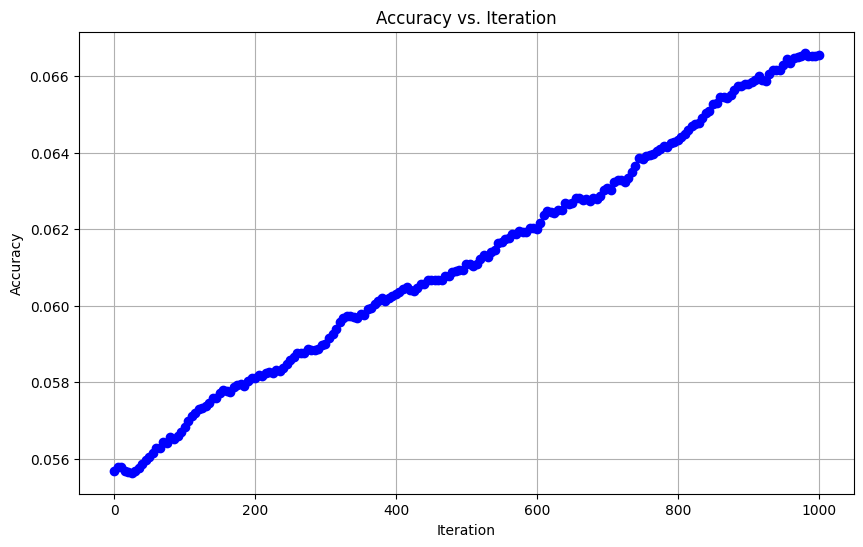

In [45]:
iterations, accuracies = zip(*accuracy_list)

plt.figure(figsize=(10, 6))
plt.plot(iterations, accuracies, marker='o', linestyle='-', color='b')
plt.title('Accuracy vs. Iteration')
plt.xlabel('Iteration')
plt.ylabel('Accuracy')
plt.grid(True)
plt.show()

In [46]:
def test_predictions(W1, b1, W2, b2, X_test, y_test):
    test = make_prediction(X_test, W1, b1, W2, b2)
    image = X_test.T
    print(test.shape)
    accuracy = accuracy_sc(test, y_test)
    print(f"Accuracy:{accuracy}")
    y_test_label = obtain_predictions(y_test)
    for i in range(10):
        print(test[i], y_test_label[i])
        print(image[i].shape)
        plot_image(image[i])

(1000,)
Accuracy:0.051
5 7
(784,)
(28, 28)


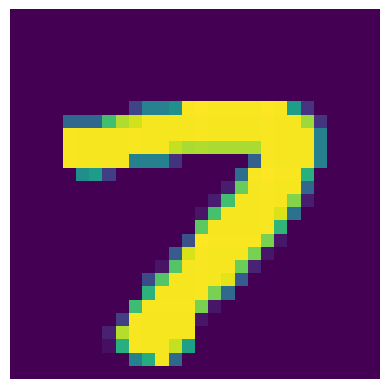

0 9
(784,)
(28, 28)


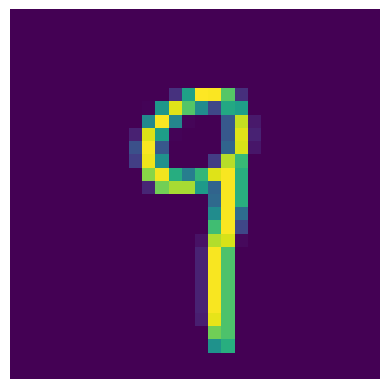

0 0
(784,)
(28, 28)


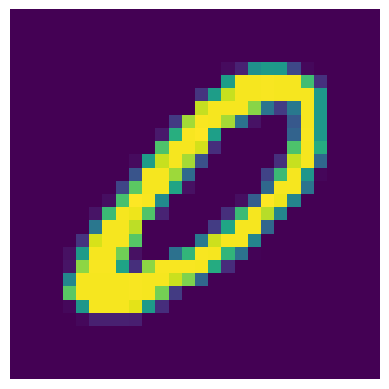

0 9
(784,)
(28, 28)


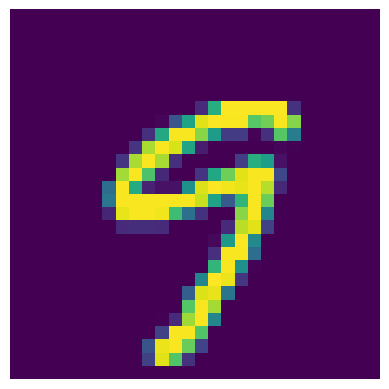

1 0
(784,)
(28, 28)


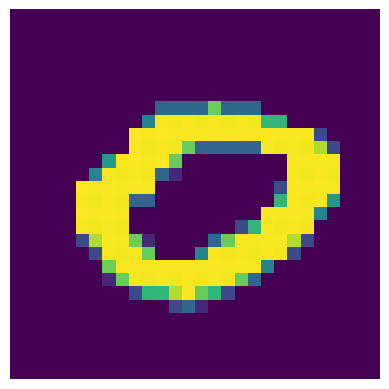

7 9
(784,)
(28, 28)


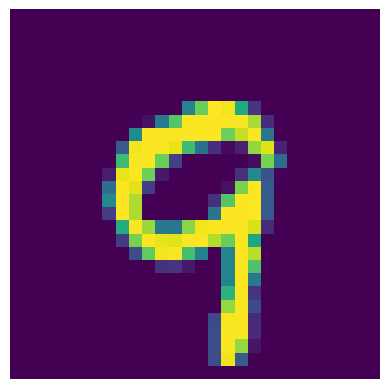

8 9
(784,)
(28, 28)


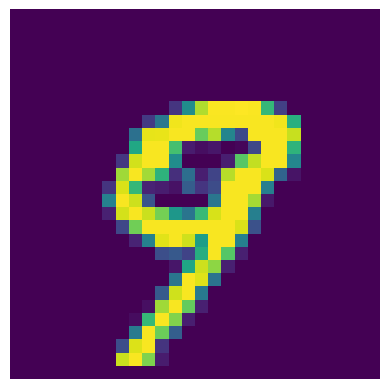

3 3
(784,)
(28, 28)


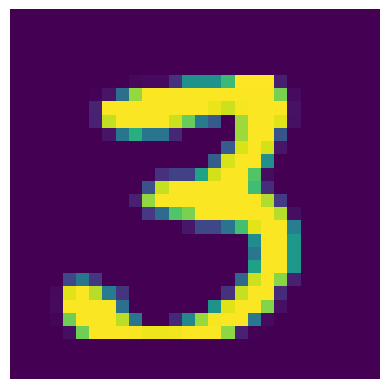

3 4
(784,)
(28, 28)


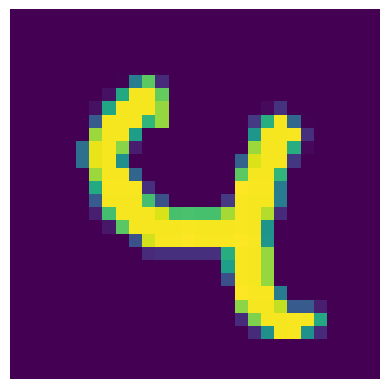

9 2
(784,)
(28, 28)


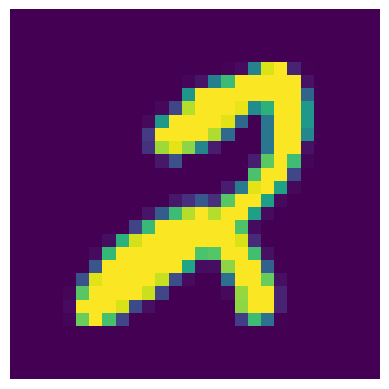

In [47]:
test_predictions(W1, b1, W2, b2, X_test, y_test)